# MLOps homework assignment 2 - Diabetes

First, lets start out by installing and/or importing the necessary starter libraries.

In [1]:
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
      
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')

# pandas as pd   
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')

try:
    import sklearn
    print('sklearn already installed, only imported')
except:
    !pip install scikit-learn
    import sklearn
    print('sklearn was not installed, installed and imported')

try:
    import seaborn as sns
    print('seaborn already installed, only imported')
except:
    !pip install seaborn
    import seaborn as sns
    print('seaborn was not installed, installed and imported')

NumPy already installed, only imported
PyPlot already installed, only imported
pandas already installed, only imported
sklearn already installed, only imported
seaborn already installed, only imported


Now, let's load the diabetes dataset and check it out by displaying the first five rows.

In [2]:
#read out the tsv file and rename columns (personal preference)
diabetes_DF = pd.read_csv('diabetes.tsv', sep='\t').rename(columns={
    'AGE': 'age', 'SEX': 'sex', 'BMI': 'bmi', 
    'BP': 'bp', 'S1': 's1', 'S2': 's2', 'S3': 's3', 
    'S4': 's4', 'S5': 's5', 'S6': 's6', 'Y': 'progression'})

#show first 5 rows
diabetes_DF.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


Information regarding the different columns within the dataset can read up-on below

In [3]:
from sklearn.datasets import load_diabetes

#load the diabetes dataset
diabetes_data = load_diabetes()

diabetes_desc = diabetes_data.DESCR
print(diabetes_desc)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## Find top 3 predictive features according to 3 different methods of measuring predictiveness

### Method #1: Feature importance

Feature importance refers to a technique used in machine learning to determine the relevance or contribution of each feature (input variable) in predicting the target variable. It helps identify which features have a stronger influence on the model's predictions and can provide insights into the underlying relationships between the features and the target variable.

For this method, I will be using the **RandomForestRegressor** since it contains the **feature_importances** variable

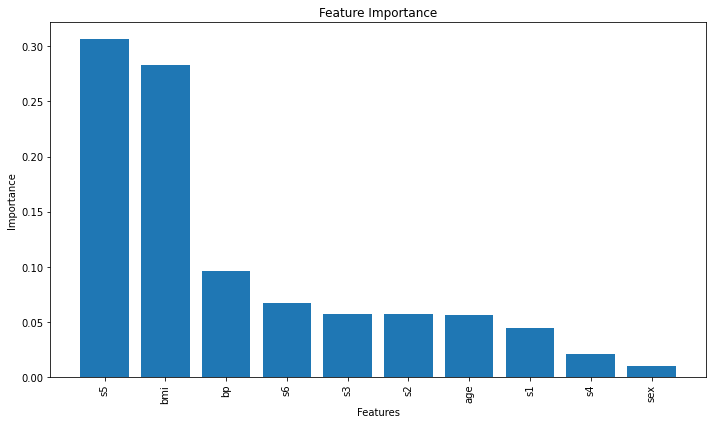

In [4]:
from sklearn.ensemble import RandomForestRegressor

X, y = diabetes_DF.iloc[:, 0:10], diabetes_DF['progression']

model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_

# Sort the importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = X.columns[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

### Method #2: Correlation matrix

A correlation matrix is a square matrix that displays the correlation coefficients between pairs of variables in a dataset. It provides a summary of the linear relationship between multiple variables, allowing you to assess the strength and direction of the relationships.

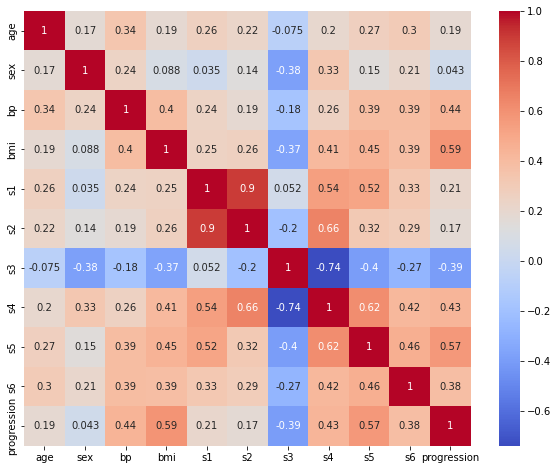

In [28]:
correlation_matrix = diabetes_DF.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Method #3: Univariate feature selection

Univariate feature selection is a common technique used in machine learning and feature selection to identify the most relevant features for a predictive model by considering their individual relationship with the target variable. It operates on one feature at a time and evaluates each feature independently, disregarding the interaction or combination of features.

In [6]:
from sklearn.feature_selection import SelectKBest, f_regression

X = diabetes_DF.iloc[:, 0:10]
y = diabetes_DF['progression']

selector = SelectKBest(score_func=f_regression, k=3)  # Select top 3 features
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]

# Print selected features from univariate selection
print("Selected Features from Univariate Selection:")
print(selected_features)

Selected Features from Univariate Selection:
Index(['bmi', 'bp', 's5'], dtype='object')


### Method #4: Mutual Information Scores

Mutual Information (MI) scores are a measure of the statistical dependence or mutual information between two variables. In the context of feature selection, mutual information scores are used to assess the relevance or information gain provided by each feature in relation to the target variable.

In [7]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Print mutual information scores
print("Mutual Information Scores:")
print(mi_scores)

Mutual Information Scores:
bmi    0.176865
s5     0.148837
s6     0.107177
s4     0.103271
s1     0.063100
bp     0.059170
s3     0.058922
sex    0.043074
s2     0.011345
age    0.000000
dtype: float64


Now that we have tried various methods for determining the best features, let's take the top three from each one of them and then determine which three appear the most!

Method 1: s5, bmi, bp<br>
Method 2: bmi, s5, bp<br>
Method 3: bmi, s5, bp<br>
Method 4: bmi, s5, s6

From this, we can concluded that the top 3 features are: **bmi**, **s5** and **bp**

## Design 2 new features

Given the fact that the our top three features are bmi, s5 and bp, it would only be appropriate if the two 2 new features were related to these features.

For the 2 new features, I want chose **blood pressure category** and **bmi category**. For the blood pressure category, I want to add **'Normal'**, **'Elevated'**, **'High'** and **'Extremely High'** categories. As for the bmi category, I want to add **'Underweight'**, **'Normal Weight'**, **'Overweight'** and **'Obese'** categories.

In [8]:
# add new column to dataframe named bp_category with corresponding labels and bins
diabetes_DF['bp_category'] = pd.cut(diabetes_DF['bp'], bins=[0, 80, 90, 120, 1000],
                           labels=['Normal', 'Elevated', 'High', 'Extremely High'])

# add new column to dataframe named bmi_category with corresponding labels and bins
diabetes_DF['bmi_category'] = pd.cut(diabetes_DF['bmi'], bins=[0, 18.5, 25, 30, 100],
                            labels=['Underweight', 'Normal Weight', 'Overweight', 'Obese'])

# make a list of columns (personal preference)
reorder_columns = ['age', 'sex', 'bp', 'bmi', 's1', 's2', 's3', 's4', 's5', 's6', 'bp_category', 'bmi_category', 'progression']

#re-order the dataframe based on the list (personal preference)
diabetes_DF = diabetes_DF[reorder_columns]

In [9]:
#display the first five rows to check out the newly updated dataframe
diabetes_DF.head(5)

,age,sex,bp,bmi,s1,s2,s3,s4,s5,s6,bp_category,bmi_category,progression
0,59,2,101.0,32.1,157,93.2,38.0,4.0,4.8598,87,High,Obese,151
1,48,1,87.0,21.6,183,103.2,70.0,3.0,3.8918,69,Elevated,Normal Weight,75
2,72,2,93.0,30.5,156,93.6,41.0,4.0,4.6728,85,High,Obese,141
3,24,1,84.0,25.3,198,131.4,40.0,5.0,4.8903,89,Elevated,Overweight,206
4,50,1,101.0,23.0,192,125.4,52.0,4.0,4.2905,80,High,Normal Weight,135


## Pre-process necessary features

Let's import the necessary libraries needed for pre-processing of the features as well as for pipelines

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [11]:
#check for whether dataframe contains any missing values
diabetes_DF.isnull().sum()

age             0
sex             0
bp              0
bmi             0
s1              0
s2              0
s3              0
s4              0
s5              0
s6              0
bp_category     0
bmi_category    0
progression     0
dtype: int64

Lets put all of our numerical features into a separate list and create a new pipeline in which we will add two steps, namely: an **imputer** and a **scaler**. For the imputer, we will use the "mean" strategy to account for missing values. For any missing values we will replace them with the median of the other values (yes I know that there are no missing values becaue I checked it earlier, but it is still good practice to use this). As for the scaler, let's just used the stand scaler to normalize the data.

In [12]:
#create a list with numerical feature names
numeric_features = ['s5']

#create a pipeline which holds the imputer and scaler
numeric_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())
])

Lets put all of our categorical features into a separate list and create a new pipeline in which we will add two steps, namely: an **encoder** and a **selector**. For the encoder, we will use the one hot encoder to convert our categorical inputs into a vector of numerical values which we need to feed to the models that cannot take in categorical values. If there are unkown values (missing), we just ignore them. As for the selector, we use the chi2 algorithm to take the 50 percentile of the useful features. This might not be needed for a small dataset like this, but it is definitely handy when the dataset is big and needs to be reduced. On top of this, this can help the performance of a model by only taking the relevant information.

In [13]:
#create a list of categorical feature names
categorical_features = ['bp_category', 'bmi_category']

#create pipeline which holds the encoder and the selector
categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore")), 
    ("selector", SelectPercentile(chi2, percentile=50))
])

In [14]:
#create a column transformer which takes in the two previous pipelines (for numerical and categorical values) and merges them
preprocessor = ColumnTransformer(transformers=[
    ("numerical", numeric_transformer, numeric_features),
    ("categorical", categorical_transformer, categorical_features)
])

## Predict how disease progresses 1 year from datapoint

Now lets get some data and try out a machine learning algorithm suited for our use case.

In [15]:
from sklearn.linear_model import LinearRegression

# create a new pipeline which takes the column transformer that was created with the previous two pipelines
# and also create an instance of a machine learning regressor, in our case, LinearRegression
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())])

In [16]:
# grab the independent (X) and the dependent (y) variables and store them into a separate dataframe/object
X = diabetes_DF[['bp_category', 'bmi_category', 's5']]
y = diabetes_DF['progression']

In [17]:
from sklearn.model_selection import train_test_split

#split the data into train and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

To measure the time of the execution of the pipeline, feel free to uncomment the cell below and run the code.

In [ ]:
# import time

# start_time = time.time()

# pipeline.fit(X_train, y_train)

# end_time = time.time()

# total_time = end_time - start_time

# print("Total time: {:.2f} seconds".format(total_time))

In [18]:
#fit the training data to our model through the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['s5']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=50,
                                                                                    score_func=<function chi2 at 0x0000025A2F4593F0>))]),
                                                  ['bp_category',
                                                   'bmi_category'])])),
                ('regressor', LinearRegression())])

In [19]:
#use a random data point to test the progression of the disease (i used the first row in the testing data)
data_point = X_test.iloc[0:1]
data_point

,bp_category,bmi_category,s5
287,Elevated,Overweight,4.9972


In [20]:
#display the prediction of the progression from the datapoint
y_pred = pipeline.predict(data_point)
print(f'The predicted progression of the disease after 1 year of the datapoint is: {y_pred}')

The predicted progression of the disease after 1 year of the datapoint is: [179.3279604]


## Report score/accuracy in at least 2 different formats

Now, let's assess the score/accuracy of the model using various formats which are available for the assessment of regression algorithms

In [21]:
#get the predictions again, but this time with the entirety of the testing set
y_pred = pipeline.predict(X_test)

### Mean Sqaured Error (MSE)

Mean Squared Error is a common metric used to evaluate the performance of a regression model. MSE measures the average squared difference between the predicted values and the actual values.

In [22]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  2880.2109013271397


### Mean Absolute Error (MAE)

Mean Absolute Error is a common used metric for evaluating the performance of a regression model. MAE measures the average absolute difference between the predicted values and the actual values.

In [23]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 43.6126698185232


### Pearson's correlation coefficient

Pearson's correlation coefficient, often denoted as "r," is a statistical measure that quantifies the strength and direction of the linear relationship between two continuous variables. It assesses how closely the data points of two variables align along a straight line.

In [24]:
from scipy.stats import pearsonr

corr, _ = pearsonr(y_test, y_pred)
print("Pearson's correlation coefficient:", corr)

Pearson's correlation coefficient: 0.6773964735111175


### R-Squared (R2 / determination coeffient) / Variance score

R-Squared, also known as the determination coefficient, is a statistical measure that quantifies the proportion of the variance in the dependent variable (target variable) that can be explained by the independent variables (predictor variables) in a regression model.

In [25]:
score = pipeline.score(X_test, y_test)
print(f'The R-Squared score is: {score}')

The R-Squared score is: 0.45637440412431496
